In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import keras 
keras.__version__

'2.2.5'

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.1, shear_range=0.1, horizontal_flip=True, validation_split=0.2)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
training_set = datagen.flow_from_directory(directory='/content/drive/My Drive/cnn/dataset2', 
                                           target_size=(200, 200), 
                                           batch_size=32, 
                                           class_mode='categorical', 
                                           subset='training')
validation_set = datagen.flow_from_directory(directory='/content/drive/My Drive/cnn/dataset2', 
                                           target_size=(200, 200), 
                                           batch_size=32, 
                                           class_mode='categorical', 
                                           subset='validation')

Found 446 images belonging to 7 classes.
Found 107 images belonging to 7 classes.


In [6]:
num_train_steps = len(training_set.filenames) // 32
num_valid_steps = len(validation_set.filenames) // 32

print(num_train_steps)
print(num_valid_steps)

13
3


In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [8]:
from keras.optimizers import Adam

model.compile(loss="categorical_crossentropy",
              optimizer=Adam(lr=0.001),
              metrics=["accuracy"])

W0906 00:07:54.206847 139881331922816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0906 00:07:54.218565 139881331922816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
hist = model.fit_generator(training_set,
                         steps_per_epoch=num_train_steps, 
                         validation_data=validation_set, 
                         validation_steps=num_valid_steps, 
                         epochs=40)
model.save('/content/drive/My Drive/cnn/percobaan_epoch40.h5')

Epoch 1/40
13/13 [==============================] - 10s 750ms/step - loss: 0.6154 - acc: 0.7317 - val_loss: 1.0350 - val_acc: 0.5833
Epoch 2/40
13/13 [==============================] - 10s 759ms/step - loss: 0.6250 - acc: 0.7414 - val_loss: 0.7369 - val_acc: 0.7600
Epoch 3/40
13/13 [==============================] - 9s 686ms/step - loss: 0.5484 - acc: 0.7753 - val_loss: 0.8319 - val_acc: 0.6800
Epoch 4/40
13/13 [==============================] - 8s 652ms/step - loss: 0.6329 - acc: 0.7236 - val_loss: 0.8118 - val_acc: 0.6267
Epoch 5/40
13/13 [==============================] - 9s 714ms/step - loss: 0.5237 - acc: 0.7718 - val_loss: 0.7752 - val_acc: 0.7292
Epoch 6/40
13/13 [==============================] - 10s 766ms/step - loss: 0.5342 - acc: 0.7476 - val_loss: 0.8243 - val_acc: 0.6400
Epoch 7/40
13/13 [==============================] - 9s 656ms/step - loss: 0.6602 - acc: 0.7143 - val_loss: 0.8875 - val_acc: 0.6667
Epoch 8/40
13/13 [==============================] - 9s 654ms/step - loss:

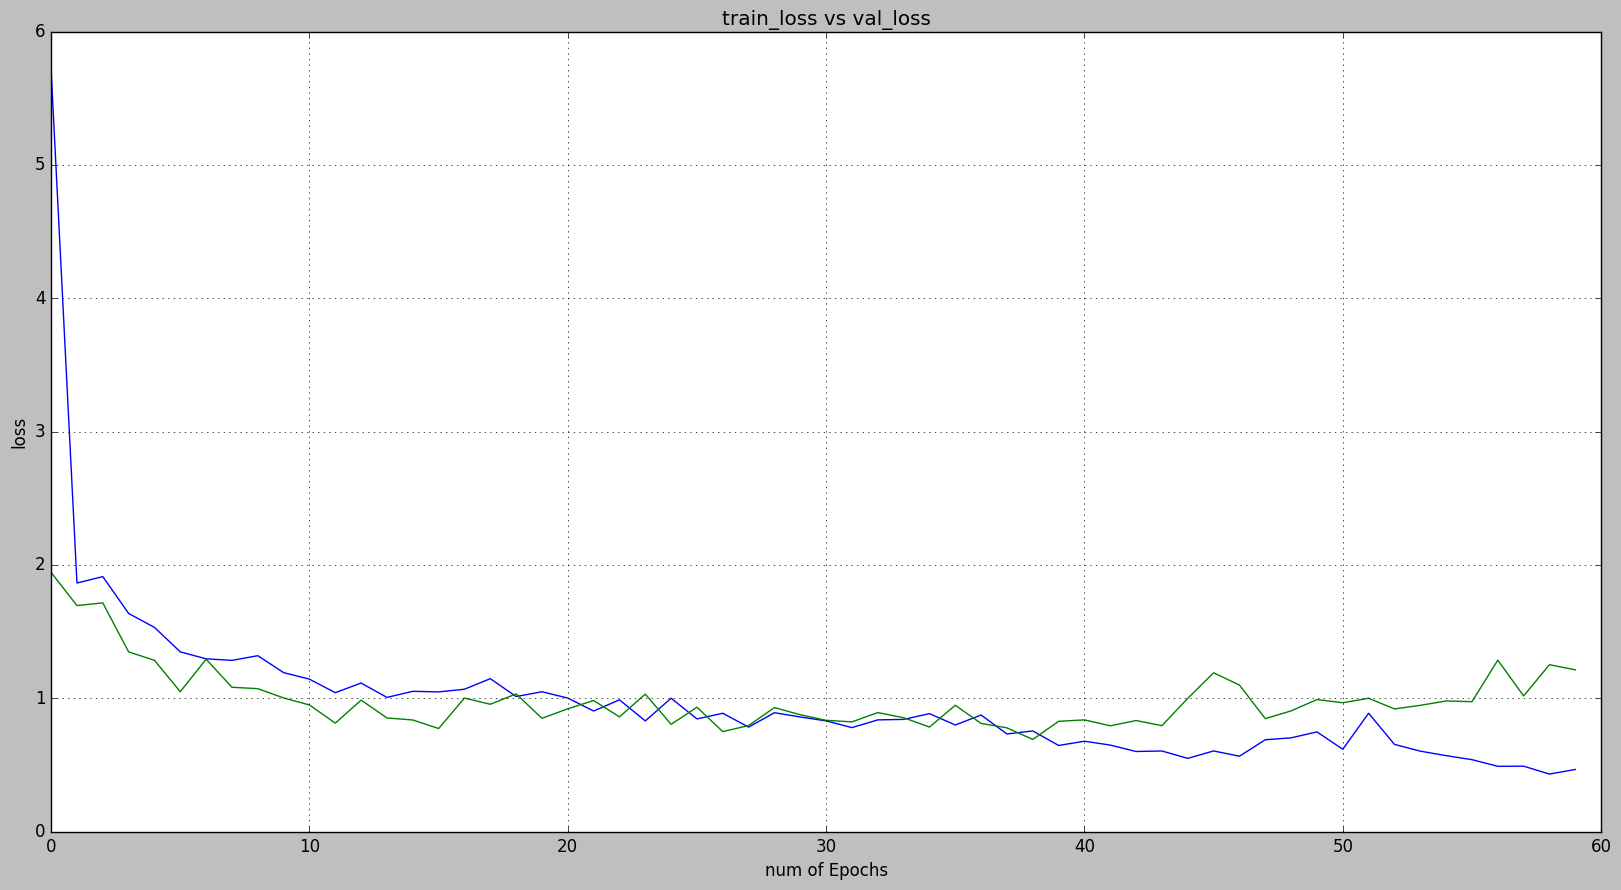

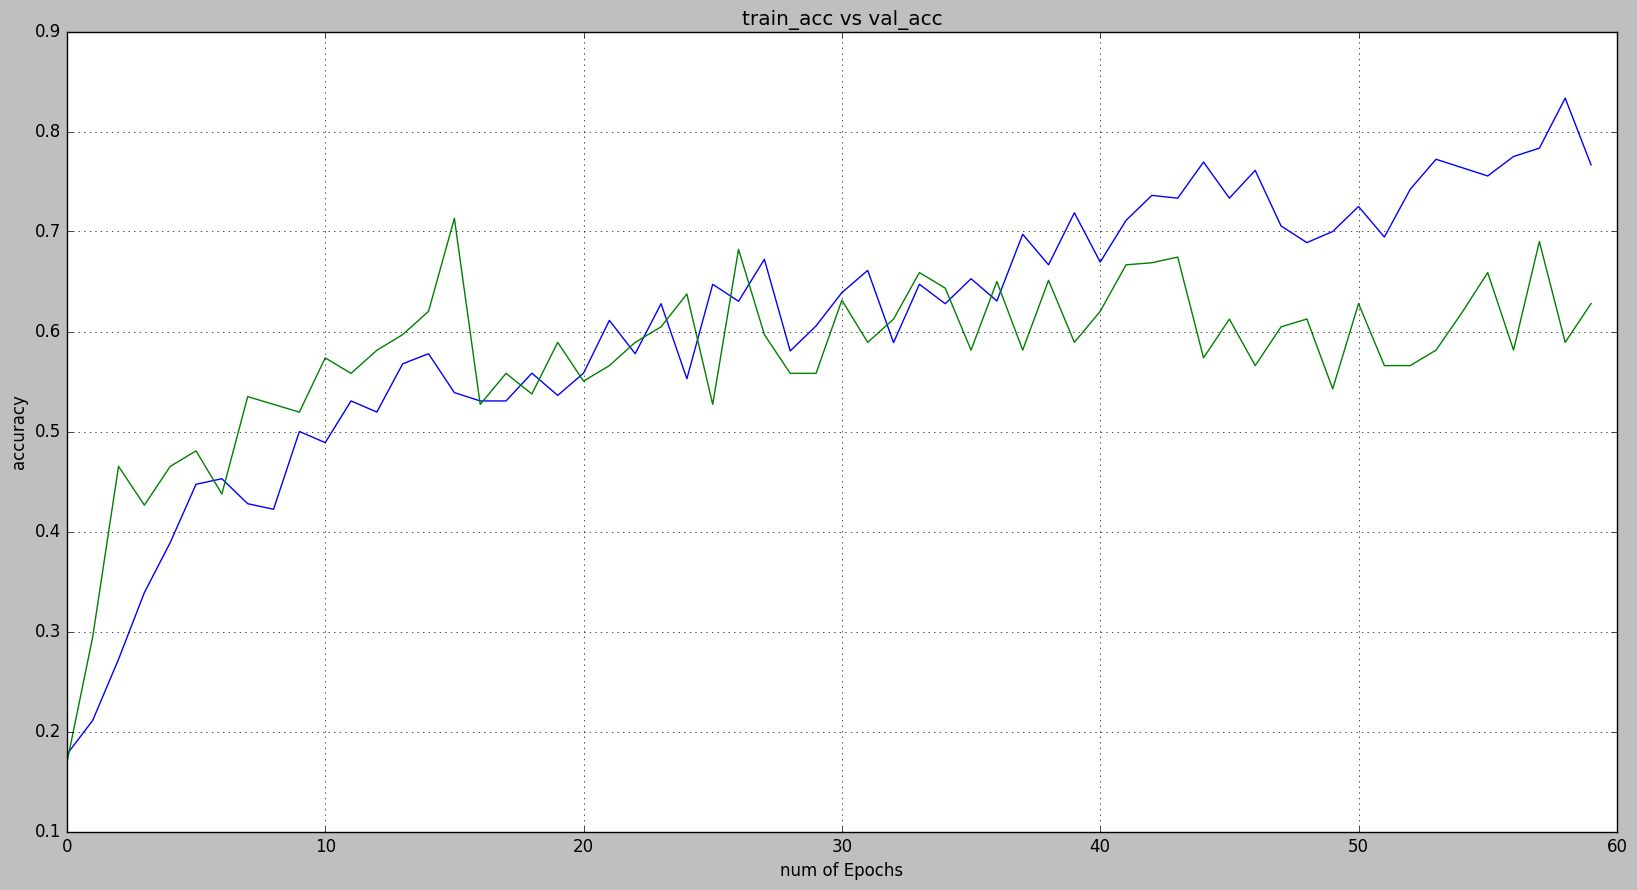

In [0]:
# trained_model.summary()
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(60)

plt.figure(1,figsize=(20,10), dpi=100)
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
# plt.legend(['train','val'])
plt.style.use(['classic'])
plt.savefig('train_loss vs val_loss data Val 30%.png')

plt.figure(2,figsize=(20,10), dpi=100)
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
# plt.legend(['train','val'])
plt.style.use(['classic'])
plt.savefig('train_acc vs val_acc data Val 30%.png')

In [0]:
from keras.models import load_model

trained_model = load_model('model_manggis_adamNewData.h5')

OSError: ignored

In [0]:
trained_model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d_1", "trainable": true, "batch_input_shape": [null, 200, 200, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Conv2D", "config": {"name": "conv2d_2", "trainable": true, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"

In [0]:
import numpy as np
from keras.preprocessing import image
import math

img_path = '/content/drive/My Drive/cnn/ywudjewr.png'
img = image.load_img(img_path, target_size=(200, 200))
test_image = image.img_to_array(img)
test_image = np.expand_dims(test_image, axis = 0)
result = trained_model.predict(test_image)
classes = list(training_set.class_indices)
hasil = ''
for i in range(len(classes)):
    hasil += str(classes[i]) + ' : ' + str(math.floor(result[0][i] * 100)) + '%' + '\n'
#     hasil += str(classes[i]) + ' : ' + str(result[0][i]) + '\n'
print(hasil)



SyntaxError: ignored

In [0]:
# from visualization import Visualization

Using TensorFlow backend.


In [0]:
# Visualization.visualize(test_image, trained_model, 1)
# # visualize(test_image, trained_model, 1)